In [1]:
import pandas as pd
import numpy as np
import nltk

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so
import utils

In [2]:
evo_df = pd.read_csv('./data/csv/output.csv')

In [3]:
evo_df.head(5)

,Unnamed: 0,jira,issue_id,history_order,field,field_evo_order,field_evo_first,field_evo_last,data_from,data_to,...,last_creator,last_reporter,last_assignee,last_commenter,last_evolver,prev_creators,prev_reporters,prev_assignees,prev_commenters,prev_evolvers
0,18323789,Jira,1803818,0,Summary,0,True,True,NaN,Sourcetree crashes,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
1,18323790,Jira,1803818,0,Description,0,True,True,NaN,"Source tree crashes everytime i open , I have ...",...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
2,18323791,Jira,1803818,0,VersionsAffected,0,True,True,NaN,3.4.4,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
3,18323792,Jira,1803818,0,IssueType,0,True,True,NaN,Bug,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]
4,18323793,Jira,1803818,0,Project,0,True,True,NaN,Sourcetree for Windows,...,NaN,NaN,NaN,NaN,NaN,[],[],[],[],[]


In [4]:
evo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753336 entries, 0 to 8753335
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   jira                    object 
 2   issue_id                int64  
 3   history_order           int64  
 4   field                   object 
 5   field_evo_order         int64  
 6   field_evo_first         bool   
 7   field_evo_last          bool   
 8   data_from               object 
 9   data_to                 object 
 10  history_author          object 
 11  history_created_date    object 
 12  issue_self              object 
 13  issue_creator           object 
 14  issue_created_date      object 
 15  final_issuetype         object 
 16  final_issuetype_theme   object 
 17  final_issuetype_code    object 
 18  final_project           object 
 19  minutes_since_creation  float64
 20  hours_since_creation    float64
 21  days_since_creation     float64

In [5]:
val = evo_df['history_author'].unique()
val.size

101400

In [6]:
val = evo_df['issue_creator'].unique()
val.size

51338

# Full Dataset

### Preprocessing
https://michael-fuchs-python.netlify.app/2021/05/22/nlp-text-pre-processing-i-text-cleaning/#extra-count-words

In [7]:
df_sum = evo_df[evo_df["field"] == "Summary"]
df_sum_processed = df_sum.filter(['issue_id', 'history_order', 'field_evo_order', 'data_from', 'data_to'], axis=1)
df_sum_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441960 entries, 0 to 8753322
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   issue_id         441960 non-null  int64 
 1   history_order    441960 non-null  int64 
 2   field_evo_order  441960 non-null  int64 
 3   data_from        47292 non-null   object
 4   data_to          441954 non-null  object
dtypes: int64(3), object(2)
memory usage: 20.2+ MB


In [8]:
df_sum_processed['word_count'] = df_sum_processed['data_to'].str.count(' ') + 1
df_sum_processed.sort_values('issue_id')
df_sum_processed.head(5)

,issue_id,history_order,field_evo_order,data_from,data_to,word_count
0,1803818,0,0,NaN,Sourcetree crashes,2.0
18,1795802,0,0,NaN,Checksummed file size doesn't match during update,7.0
35,1795162,0,0,NaN,Checksummed file size doesn't match during update,7.0
51,1794394,0,0,NaN,Checksum error on update,4.0
68,1788469,0,0,NaN,Dictionary file blocks Sourcetree 2.3.1 from s...,8.0


In [9]:
entry = df_sum_processed[df_sum_processed['issue_id'] == 1176683]
entry

,issue_id,history_order,field_evo_order,data_from,data_to,word_count
4671,1176683,0,0,NaN,Remote code execution vulnerability for Source...,8.0
4698,1176683,9,1,Remote code execution vulnerability for Source...,Remote code execution vulnerability for Source...,10.0
4699,1176683,10,2,Remote code execution vulnerability for Source...,Remote code execution vulnerability for Source...,10.0


In [10]:
n = len(pd.unique(df_sum_processed['issue_id']))
 
print("No.of.unique ids :", n)

No.of.unique ids : 385612


In [11]:
df_sum_processed.to_csv("data/csv/summary_df.csv")

### Visualization

In [12]:

df = pd.read_csv('./data/csv/summary_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441960 entries, 0 to 441959
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       441960 non-null  int64  
 1   issue_id         441960 non-null  int64  
 2   history_order    441960 non-null  int64  
 3   field_evo_order  441960 non-null  int64  
 4   data_from        47292 non-null   object 
 5   data_to          441954 non-null  object 
 6   word_count       441954 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 23.6+ MB


In [13]:
df[df['field_evo_order'] >= 4]

,Unnamed: 0,issue_id,history_order,field_evo_order,data_from,data_to,word_count
654,12989,955027,9,4,Argument injection through the name of a tag i...,Argument injection via Mercurial tag names on ...,10.0
7938,156437,1207792,5,4,Jira Server to Cloud migrations failing when S...,Jira Server to Cloud migrations failing when S...,15.0
7939,156438,1207792,6,5,Jira Server to Cloud migrations failing when S...,Jira Server to Cloud migrations failing when S...,15.0
7940,156439,1207792,7,6,Jira Server to Cloud migrations failing when S...,Restore from Jira Server backup failing when S...,15.0
8339,164722,947705,21,4,"Internet Explorer (IE) 11 throws ""TypeError: O...","Internet Explorer (IE) 11 throws ""TypeError: O...",15.0
...,...,...,...,...,...,...,...
438307,8689724,12555779,8,4,Migrate to all modules to android-maven-plugin...,Migrate all modules to android-maven-plugin 4....,6.0
439194,8705571,12747367,18,4,Display the name and the link to the UPS Varia...,Verify displaying the name and the link to the...,16.0
439564,8712017,12735686,11,4,Use timescaledb on openshift for app-metrics,Use timescaledb on openshift for Prometheus lo...,9.0
439565,8712018,12735686,12,5,Use timescaledb on openshift for Prometheus lo...,Use timescaledb in the Metrics APB for Prometh...,11.0


In [14]:
df[df['issue_id'] == 955027]

,Unnamed: 0,issue_id,history_order,field_evo_order,data_from,data_to,word_count
650,12961,955027,0,0,NaN,Argument injection through the name of a tag i...,13.0
651,12986,955027,6,1,Argument injection through the name of a tag i...,Argument injection through the name of a tag i...,14.0
652,12987,955027,7,2,Argument injection through the name of a tag i...,Argument injection through the name of a tag i...,15.0
653,12988,955027,8,3,Argument injection through the name of a tag i...,Argument injection through the name of a tag i...,14.0
654,12989,955027,9,4,Argument injection through the name of a tag i...,Argument injection via Mercurial tag names on ...,10.0


In [15]:
df.describe()

,Unnamed: 0,issue_id,history_order,field_evo_order,word_count
count,4.419600e+05,4.419600e+05,441960.000000,441960.000000,441954.000000
mean,4.421189e+06,6.164607e+06,0.428208,0.131829,8.513223
std,2.543486e+06,6.125255e+06,1.949329,0.429563,4.163469
min,0.000000e+00,1.013600e+04,0.000000,0.000000,1.000000
25%,2.253026e+06,2.776170e+05,0.000000,0.000000,6.000000
50%,4.453364e+06,1.385746e+06,0.000000,0.000000,8.000000
75%,6.617714e+06,1.260790e+07,0.000000,0.000000,11.000000
max,8.753322e+06,1.441846e+07,154.000000,16.000000,53.000000


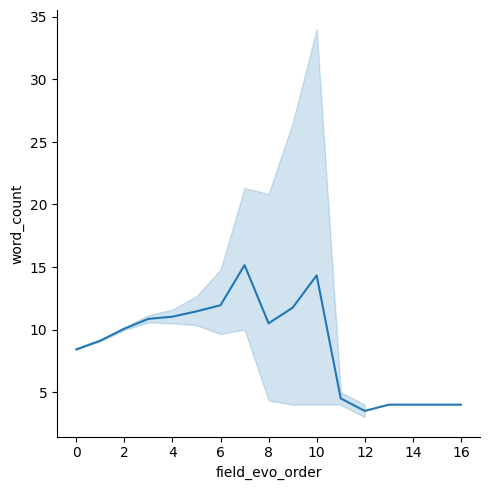

In [16]:

sns.relplot(data=df, kind="line", x="field_evo_order", y="word_count", facet_kws=dict(sharex=False),)

<Axes: xlabel='field_evo_order', ylabel='word_count'>

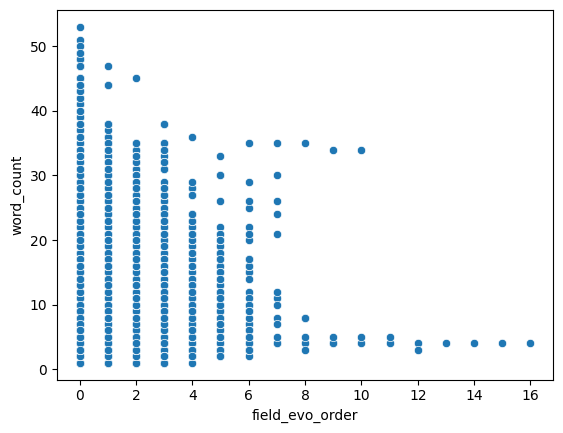

In [17]:
sns.scatterplot(data=df, x="field_evo_order", y="word_count")

<Axes: xlabel='field_evo_order', ylabel='word_count'>

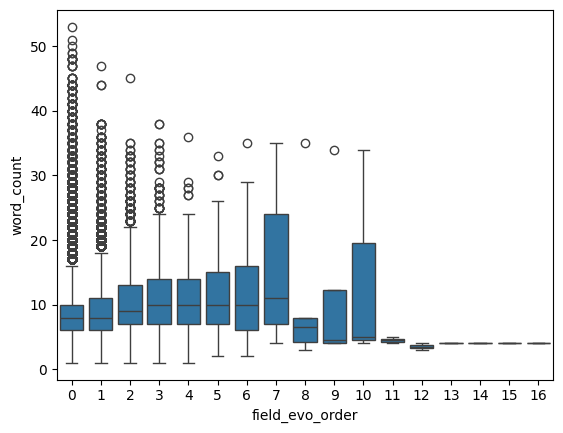

In [18]:
sns.boxplot(data=df, x="field_evo_order", y="word_count")

# For possible Teams

### Preprocessing

In [19]:
max_evo_index = evo_df.groupby(['issue_id'])['history_order'].idxmax()

In [20]:
max_evo_df = evo_df.loc[max_evo_index]
max_evo_df.head(5)

,Unnamed: 0,jira,issue_id,history_order,field,field_evo_order,field_evo_first,field_evo_last,data_from,data_to,...,last_creator,last_reporter,last_assignee,last_commenter,last_evolver,prev_creators,prev_reporters,prev_assignees,prev_commenters,prev_evolvers
6582068,27416322,RedHat,10136,2,Resolution,0,True,True,NaN,Done,...,Ronald van Kuijk,Ronald van Kuijk,Tom Baeyens,Tom Baeyens,Tom Baeyens,['Ronald van Kuijk'],['Ronald van Kuijk'],['Tom Baeyens'],['Tom Baeyens'],"['Ronald van Kuijk', 'Tom Baeyens']"
887558,19254001,Jira,10142,3,Status,1,False,True,Resolved,Closed,...,Mike Cannon-Brookes,Mike Cannon-Brookes,Mike Cannon-Brookes,NaN,Confluence Escalation Bot,['Mike Cannon-Brookes'],['Mike Cannon-Brookes'],['Mike Cannon-Brookes'],[],"['Mike Cannon-Brookes', 'Oswaldo Hernandez', '..."
887533,19253976,Jira,10143,6,Status,1,False,True,Resolved,Closed,...,Mike Cannon-Brookes,Mike Cannon-Brookes,Mike Cannon-Brookes,Minion Bot,Confluence Escalation Bot,['Mike Cannon-Brookes'],['Mike Cannon-Brookes'],['Mike Cannon-Brookes'],"['Minion Bot', 'Minion Bot', 'Minion Bot']","['Mike Cannon-Brookes', 'Minion Bot', 'Minion ..."
887505,19253948,Jira,10144,6,Status,4,False,True,RESOLVED,Closed,...,Mike Cannon-Brookes,Mike Cannon-Brookes,Mike Cannon-Brookes,Mike Cannon-Brookes,Rachel Lin,['Mike Cannon-Brookes'],['Mike Cannon-Brookes'],['Mike Cannon-Brookes'],['Mike Cannon-Brookes'],"['Mike Cannon-Brookes', 'Mike Cannon-Brookes',..."
887476,19253919,Jira,10146,6,Status,4,False,True,RESOLVED,Closed,...,Mike Cannon-Brookes,Mike Cannon-Brookes,Mike Cannon-Brookes,Mike Cannon-Brookes,Rachel Lin,['Mike Cannon-Brookes'],['Mike Cannon-Brookes'],['Mike Cannon-Brookes'],['Mike Cannon-Brookes'],"['Mike Cannon-Brookes', 'Mike Cannon-Brookes',..."


In [42]:
def combineWorkers(entry):
    print(entry)
    workers = np.concatenate((entry['prev_evolvers'], entry['last_evolver']))
    entry['evolvers'] = np.unique(workers)
    


In [43]:
max_evo_df.apply(combineWorkers, axis=1)



#df_sum_processed['word_count'] = df_sum_processed['data_to'].str.count(' ') + 1
#df_sum_processed['summary_evo'] = df_sum_processed.groupby('issue_id').cumcount() + 1
#df_sum_processed.sort_values('issue_id')
#df_sum_processed.head(5)

Unnamed: 0                                                        27416322
jira                                                                RedHat
issue_id                                                             10136
history_order                                                            2
field                                                           Resolution
field_evo_order                                                          0
field_evo_first                                                       True
field_evo_last                                                        True
data_from                                                              NaN
data_to                                                               Done
history_author                                                 Tom Baeyens
history_created_date                             2004-11-23 04:40:53+00:00
issue_self                https://issues.redhat.com/rest/api/2/issue/10136
issue_creator            

ValueError: zero-dimensional arrays cannot be concatenated

In [ ]:
df_sum = evo_df[evo_df["field"] == "Summary"]
df_sum_processed = df_sum.filter(['issue_id', 'history_order', 'field_evo_order', 'data_from', 'data_to'], axis=1)
df_sum_processed.info()